# Exploratory Data Analysis: Toussaint Louverture International Airport 2017 - 2020

##           *   Prediction of Flight Delay

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)

## Introduction <a name="introduction"></a>

* * Project Description:


Air traffic, let's say, air transport has had a truly gigantic effect on the world. It is one of the main drivers of globalization. The commercialization of air transport has made the world a smaller, more connected place. People can easily visit, explore everywhere, every corner, even the remotest corners of the earth, allowing us to connect with cultures far removed from our own. Businesses can grow and connect with each other, and goods can be shipped around the world in a matter of hours, travel around the world has become faster with air travel.
However, in spite of all the beauty of this means of transport and all its comfort, all is not rosy for the airlines, certainly, air traffic generates big profits, and yet, some problems come to hinder them, such as: airplane accidents, breakdowns or flight delays, etc... Let's look at flight delays, because that's what my study will be based on. What is flight delay? A flight delay is when a plane should leave or arrive at a scheduled time, yet it's delayed or landed later than planned.
I remember, as a teenager, my mother's sister who was suffering from serious heart disease, had to be sent to Florida for surgery, she had to fly at 9 am, however, the flight was delayed, she couldn't get there in time for her operation, things that quickly became very complicated, but, thanks to her, she was able to do the operation, so, we can see how a simple delay had destabilized her in a critical state. In addition, flight delays can cause the cancellation of meetings, important appointments, gatherings, ceremonies, etc... A company, which constantly has delays in its flights either on departure or arrival, could lose its customers or contracts, because a customer who is not satisfied with its services is almost lost, the loss of customers results in a decrease in revenue. The primary objective of a company is to maximize its profits while satisfying the needs of its customers, a need to move and arrive on time without any problem.
This project, I have carried out primarily for airlines who wish to optimize their delays in order to better manage their services, with the goal of increasing the confidence and loyalty of their customers. Secondly, this project affects travellers who want to know the best time according to their requirements to travel without expecting too many flight delays.

In my work, I will try to, over a period of about three years :
    *1) Look at the number of flights made through Haiti that will be divided into delays and non_delays while grouping them by :
   * A) Company
   * B) Time
   * C) Day
   * D) Month
   * E) Quarter 

2) With the Learning Machine to predict flight delays,verification of the accuracy of the prediction as well as the ROC curve


In [331]:
# Import the required packages
import pandas as pd 
import numpy as np  # linear algebra
import pylab as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Adjusting `matplotlib` parameters

In [332]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

.

# Data Preparation 

## Data <a name="data"></a>

### Data

The original data can be seen on the site Toussaint Louverture International Airport 
[source ](https://www.flightera.net/fr/airport/Port-au-Prince/MTPP/arrival "Toussaint Louverture International Airport"). The selected columns are the same as in this older.

Please refer to [this](https://github.com/Shito3/Airplanes_Analysis/tree/master/Results) notebook on how i scraped the raw data to CSV format.

### Read in the data

In [333]:
# Import Customer Churn Dataset 
url = 'Dataset/airplane_data.csv'
# Read in the data
df = pd.read_csv(url,encoding='utf-8')
# Quick insights into the dataset
df.head()

,Unnamed: 0,Date / Statut,Vol,De,Arrivée Planifiée,Départ,Arrivé,Durée,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,"dim, 01. oct 2017 07:48 EDT A Atterri",B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),07:48 EDT,06:16 EDT 16 min retard,07:54 EDT 6 min retard,1h 37m,NaN,NaN,NaN,NaN,NaN
1,1,"dim, 01. oct 2017 07:48 EDT A Atterri",B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),07:48 EDT,06:16 EDT 16 min retard,07:54 EDT 6 min retard,1h 37m,NaN,NaN,NaN,NaN,NaN
2,2,"dim, 01. oct 2017 08:00 EDT A Atterri",S6200 Flag of Haiti Sunrise Airways (S6 / KSZ),Santo Domingo (SDQ / MDSD),08:00 EDT,07:15 AST à temps,08:00 EDT à temps,45m,NaN,NaN,NaN,NaN,NaN
3,3,"dim, 01. oct 2017 08:02 EDT A Atterri",AA1158 AAL1158 American Airlines (AA / AAL),Fort Lauderdale (FLL / KFLL),08:02 EDT,06:09 EDT 9 min retard,07:46 EDT 16 min tôt,1h 36m,NaN,NaN,NaN,NaN,NaN
4,4,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...


In [334]:
# Let's delete the columns that are not part of the table.
df = df.drop(['Unnamed: 7','Unnamed: 0','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'],axis=1)

In [335]:
#Let's look at the result now.
df.head()

,Date / Statut,Vol,De,Arrivée Planifiée,Départ,Arrivé,Durée
0,"dim, 01. oct 2017 07:48 EDT A Atterri",B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),07:48 EDT,06:16 EDT 16 min retard,07:54 EDT 6 min retard,1h 37m
1,"dim, 01. oct 2017 07:48 EDT A Atterri",B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),07:48 EDT,06:16 EDT 16 min retard,07:54 EDT 6 min retard,1h 37m
2,"dim, 01. oct 2017 08:00 EDT A Atterri",S6200 Flag of Haiti Sunrise Airways (S6 / KSZ),Santo Domingo (SDQ / MDSD),08:00 EDT,07:15 AST à temps,08:00 EDT à temps,45m
3,"dim, 01. oct 2017 08:02 EDT A Atterri",AA1158 AAL1158 American Airlines (AA / AAL),Fort Lauderdale (FLL / KFLL),08:02 EDT,06:09 EDT 9 min retard,07:46 EDT 16 min tôt,1h 36m
4,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...


In [336]:
# Let's check if there are a null values
df[df['Date / Statut'].isna()]

,Date / Statut,Vol,De,Arrivée Planifiée,Départ,Arrivé,Durée
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31741,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31788,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31813,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
# Let's sum all a null values
df.isnull().sum() #

Date / Statut        1793
Vol                  1793
De                   1793
Arrivée Planifiée    1793
Départ               2523
Arrivé               2523
Durée                1905
dtype: int64

In [338]:
# Delete a missing values
df.dropna(inplace = True) 

In [339]:
df.info() # About DF

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29375 entries, 0 to 32003
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date / Statut      29375 non-null  object
 1   Vol                29375 non-null  object
 2   De                 29375 non-null  object
 3   Arrivée Planifiée  29375 non-null  object
 4   Départ             29375 non-null  object
 5   Arrivé             29375 non-null  object
 6   Durée              29375 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


In [340]:
# Delete the ADS of Google in thd Dataframe
df2 = df[~df['Date / Statut'].str.contains('window.')]

In [341]:
# Function to separate the statut of dates
def split_date_statut(x,index):
    if 'EDT' in x:
        return x.split('EDT')[index]
    elif 'AST' in x:
         return x.split('AST')[index]
    else:
        return x.split(' ')[index]

In [342]:
# Function to separate dates
def split_date(x):
    if 'EDT' in x:
        return x.split('EDT')[0]
    elif 'AST' in x:
         return x.split('AST')[0]
    else:
        return x.split(' ')[0]

In [343]:
# Test
split_date_statut('dim, 01. oct 2017 07:48 EDT A Atterri',0)

'dim, 01. oct 2017 07:48 '

In [344]:
# Test2
split_date_statut('dim, 01. oct 2017 07:48 EDT A Atterri',-1)

' A Atterri'

In [345]:
# Test3
split_date('07:48 EDT')

'07:48 '

In [346]:
# # Separation of dates and moments
df2['Date'] = df2['Date / Statut'].apply(lambda x: split_date_statut(x,0))
df2['statut'] =df2['Date / Statut'].apply(lambda x: split_date_statut(x,-1))
df2['arrival_planed_time'] =df2['Arrivée Planifiée'].apply(lambda x: split_date(x))
df2['departure_time'] = df2['Départ'].apply(lambda x: split_date_statut(x,0))
df2['departure_status'] = df2['Départ'].apply(lambda x: split_date_statut(x,-1))
df2['arriving_time'] = df2['Arrivé'].apply(lambda x: split_date_statut(x,0))
df2['arriving_status'] = df2['Arrivé'].apply(lambda x: split_date_statut(x,-1))

<ipython-input-346-f4e90a383c9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Date'] = df2['Date / Statut'].apply(lambda x: split_date_statut(x,0))
<ipython-input-346-f4e90a383c9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['statut'] =df2['Date / Statut'].apply(lambda x: split_date_statut(x,-1))
<ipython-input-346-f4e90a383c9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [347]:
df2.head()

,Date / Statut,Vol,De,Arrivée Planifiée,Départ,Arrivé,Durée,Date,statut,arrival_planed_time,departure_time,departure_status,arriving_time,arriving_status
0,"dim, 01. oct 2017 07:48 EDT A Atterri",B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),07:48 EDT,06:16 EDT 16 min retard,07:54 EDT 6 min retard,1h 37m,"dim, 01. oct 2017 07:48",A Atterri,07:48,06:16,16 min retard,07:54,6 min retard
1,"dim, 01. oct 2017 07:48 EDT A Atterri",B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),07:48 EDT,06:16 EDT 16 min retard,07:54 EDT 6 min retard,1h 37m,"dim, 01. oct 2017 07:48",A Atterri,07:48,06:16,16 min retard,07:54,6 min retard
2,"dim, 01. oct 2017 08:00 EDT A Atterri",S6200 Flag of Haiti Sunrise Airways (S6 / KSZ),Santo Domingo (SDQ / MDSD),08:00 EDT,07:15 AST à temps,08:00 EDT à temps,45m,"dim, 01. oct 2017 08:00",A Atterri,08:00,07:15,à temps,08:00,à temps
3,"dim, 01. oct 2017 08:02 EDT A Atterri",AA1158 AAL1158 American Airlines (AA / AAL),Fort Lauderdale (FLL / KFLL),08:02 EDT,06:09 EDT 9 min retard,07:46 EDT 16 min tôt,1h 36m,"dim, 01. oct 2017 08:02",A Atterri,08:02,06:09,9 min retard,07:46,16 min tôt
5,"dim, 01. oct 2017 08:02 EDT A Atterri",AA1158 AAL1158 American Airlines (AA / AAL),Fort Lauderdale (FLL / KFLL),08:02 EDT,06:09 EDT 9 min retard,07:46 EDT 16 min tôt,1h 36m,"dim, 01. oct 2017 08:02",A Atterri,08:02,06:09,9 min retard,07:46,16 min tôt


In [348]:
# Let's see the result
df2[['statut','Date']]

,statut,Date
0,A Atterri,"dim, 01. oct 2017 07:48"
1,A Atterri,"dim, 01. oct 2017 07:48"
2,A Atterri,"dim, 01. oct 2017 08:00"
3,A Atterri,"dim, 01. oct 2017 08:02"
5,A Atterri,"dim, 01. oct 2017 08:02"
...,...,...
31950,A Atterri,"sam, 11. avr 11:23"
31983,A Atterri,"jeu, 16. avr 21:45"
31986,A Atterri,"jeu, 16. avr 21:45"
31996,A Atterri,"sam, 18. avr 09:00"


In [349]:
# Let's delete the columns that are not necessary for our study.
df2 = df2.drop(['Date / Statut','Arrivée Planifiée','Départ','Arrivé'],axis=1)

In [350]:
df_final = df2.copy()

In [351]:
# the new dataframe after the deletion of unnecessary columns
df_final

,Vol,De,Durée,Date,statut,arrival_planed_time,departure_time,departure_status,arriving_time,arriving_status
0,B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),1h 37m,"dim, 01. oct 2017 07:48",A Atterri,07:48,06:16,16 min retard,07:54,6 min retard
1,B61509 JBU1509 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),1h 37m,"dim, 01. oct 2017 07:48",A Atterri,07:48,06:16,16 min retard,07:54,6 min retard
2,S6200 Flag of Haiti Sunrise Airways (S6 / KSZ),Santo Domingo (SDQ / MDSD),45m,"dim, 01. oct 2017 08:00",A Atterri,08:00,07:15,à temps,08:00,à temps
3,AA1158 AAL1158 American Airlines (AA / AAL),Fort Lauderdale (FLL / KFLL),1h 36m,"dim, 01. oct 2017 08:02",A Atterri,08:02,06:09,9 min retard,07:46,16 min tôt
5,AA1158 AAL1158 American Airlines (AA / AAL),Fort Lauderdale (FLL / KFLL),1h 36m,"dim, 01. oct 2017 08:02",A Atterri,08:02,06:09,9 min retard,07:46,16 min tôt
...,...,...,...,...,...,...,...,...,...,...
31950,NK6450 NKS6450 Spirit Airlines (NK / NKS),Fort Lauderdale (FLL / KFLL),2h 25m,"sam, 11. avr 11:23",A Atterri,11:23,09:00,planifié,11:25,2 min retard
31983,M6847 AJT847 Amerijet International (M6 / AJT),Miami (MIA / KMIA),2h 30m,"jeu, 16. avr 21:45",A Atterri,21:45,19:15,planifié,21:45,planifié
31986,M6847 AJT847 Amerijet International (M6 / AJT),Miami (MIA / KMIA),2h 30m,"jeu, 16. avr 21:45",A Atterri,21:45,19:15,planifié,21:45,planifié
31996,B66123 JBU6123 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),5h 57m,"sam, 18. avr 09:00",A Atterri,09:00,06:40,planifié,12:37,3 h 37 min retard


In [352]:
# Function dates conversion in text format
def date_convert1(x):
    map_month ={'jan':'01','fev':'02','mars':'03','avr':'04','mai':'05','juin':'06','juil':'07','août':'08','sept':'09','oct':'10','nov':'11','déc':'12'}
    val= x.split(' ')
    date_text =""
    lenght = len(val)
    print(val)
    if lenght == 4:
        old_value = val[3]
        val[3] = 2020
        val.append(old_value)
    
    if lenght >= 4:
        day =val[1].split('.')
        if len(day) >0:
            val[1] = day[0]
        year = str(val[3]).split(':')
        if len(year) > 1:
            val[3] = 2020
        date_text =str(map_month[val[2]]) + '/'+str(val[1])+ '/'+str(val[3])
        
    return date_text
    
    

In [353]:
# test of the function
date_convert1('dim, 08. mars 08:44')

['dim,', '08.', 'mars', '08:44']


'03/08/2020'

In [354]:
# Function application
df_final['date_text'] = df_final['Date'].apply(lambda x: date_convert1(x))

['dim,', '01.', 'oct', '2017', '07:48', '']
['dim,', '01.', 'oct', '2017', '07:48', '']
['dim,', '01.', 'oct', '2017', '08:00', '']
['dim,', '01.', 'oct', '2017', '08:02', '']
['dim,', '01.', 'oct', '2017', '08:02', '']
['dim,', '01.', 'oct', '2017', '08:17', '']
['dim,', '01.', 'oct', '2017', '08:30', '']
['dim,', '01.', 'oct', '2017', '09:00', '']
['dim,', '01.', 'oct', '2017', '09:11', '']
['dim,', '01.', 'oct', '2017', '09:11', '']
['dim,', '01.', 'oct', '2017', '09:20', '']
['dim,', '01.', 'oct', '2017', '09:20', '']
['dim,', '01.', 'oct', '2017', '11:09', '']
['dim,', '01.', 'oct', '2017', '11:09', '']
['dim,', '01.', 'oct', '2017', '11:10', '']
['dim,', '01.', 'oct', '2017', '11:10', '']
['dim,', '01.', 'oct', '2017', '12:59', '']
['dim,', '01.', 'oct', '2017', '12:59', '']
['dim,', '01.', 'oct', '2017', '13:10', '']
['dim,', '01.', 'oct', '2017', '13:15', '']
['dim,', '01.', 'oct', '2017', '13:15', '']
['dim,', '01.', 'oct', '2017', '13:15', '']
['dim,', '01.', 'oct', '2017', '

['jeu,', '02.', 'nov', '2017', '12:00', '']
['jeu,', '02.', 'nov', '2017', '12:15', '']
['jeu,', '02.', 'nov', '2017', '12:20', '']
['jeu,', '02.', 'nov', '2017', '13:07', '']
['jeu,', '02.', 'nov', '2017', '13:52', '']
['jeu,', '02.', 'nov', '2017', '13:56', '']
['jeu,', '02.', 'nov', '2017', '14:30', '']
['jeu,', '02.', 'nov', '2017', '14:51', '']
['jeu,', '02.', 'nov', '2017', '15:00', '']
['jeu,', '02.', 'nov', '2017', '15:35', '']
['jeu,', '02.', 'nov', '2017', '16:20', '']
['jeu,', '02.', 'nov', '2017', '16:32', '']
['jeu,', '02.', 'nov', '2017', '17:35', '']
['jeu,', '02.', 'nov', '2017', '17:45', '']
['jeu,', '02.', 'nov', '2017', '18:17', '']
['jeu,', '02.', 'nov', '2017', '18:39', '']
['jeu,', '02.', 'nov', '2017', '19:00', '']
['jeu,', '02.', 'nov', '2017', '19:00', '']
['jeu,', '02.', 'nov', '2017', '19:35', '']
['ven,', '03.', 'nov', '2017', '09:00', '']
['ven,', '03.', 'nov', '2017', '09:00', '']
['ven,', '03.', 'nov', '2017', '09:02', '']
['ven,', '03.', 'nov', '2017', '

['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
[

['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
[

['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
[

['sam,', '17.', 'mars', '2018', '09:13', '']
['sam,', '17.', 'mars', '2018', '10:59', '']
['sam,', '17.', 'mars', '2018', '11:01', '']
['sam,', '17.', 'mars', '2018', '11:15', '']
['sam,', '17.', 'mars', '2018', '12:05', '']
['sam,', '17.', 'mars', '2018', '12:19', '']
['sam,', '17.', 'mars', '2018', '13:14', '']
['sam,', '17.', 'mars', '2018', '13:18', '']
['sam,', '17.', 'mars', '2018', '14:02', '']
['sam,', '17.', 'mars', '2018', '14:30', '']
['sam,', '17.', 'mars', '2018', '14:35', '']
['sam,', '17.', 'mars', '2018', '15:22', '']
['sam,', '17.', 'mars', '2018', '16:24', '']
['sam,', '17.', 'mars', '2018', '17:49', '']
['dim,', '18.', 'mars', '2018', '07:47', '']
['dim,', '18.', 'mars', '2018', '08:01', '']
['dim,', '18.', 'mars', '2018', '09:00', '']
['dim,', '18.', 'mars', '2018', '', '09:13', '']
['dim,', '18.', 'mars', '2018', '11:01', '']
['dim,', '18.', 'mars', '2018', '12:14', '']
['dim,', '18.', 'mars', '2018', '13:18', '']
['dim,', '18.', 'mars', '2018', '13:54', '']
['dim,

['mar,', '03.', 'avr', '2018', '14:27', '']
['mar,', '03.', 'avr', '2018', '15:24', '']
['mar,', '03.', 'avr', '2018', '07:56', '']
['mar,', '03.', 'avr', '2018', '08:03', '']
['mar,', '03.', 'avr', '2018', '09:00', '']
['mar,', '03.', 'avr', '2018', '09:13', '']
['mar,', '03.', 'avr', '2018', '11:00', '']
['mar,', '03.', 'avr', '2018', '11:00', '']
['mar,', '03.', 'avr', '2018', '11:26', '']
['mar,', '03.', 'avr', '2018', '12:05', '']
['mar,', '03.', 'avr', '2018', '12:20', '']
['mar,', '03.', 'avr', '2018', '12:40', '']
['mar,', '03.', 'avr', '2018', '12:58', '']
['mar,', '03.', 'avr', '2018', '14:04', '']
['mar,', '03.', 'avr', '2018', '14:18', '']
['mar,', '03.', 'avr', '2018', '14:27', '']
['mar,', '03.', 'avr', '2018', '15:24', '']
['mar,', '03.', 'avr', '2018', '15:42', '']
['mar,', '03.', 'avr', '2018', '16:44', '']
['mer,', '04.', 'avr', '2018', '07:00', '']
['mer,', '04.', 'avr', '2018', '07:56', '']
['mer,', '04.', 'avr', '2018', '08:03', '']
['mer,', '04.', 'avr', '2018', '

['ven,', '20.', 'avr', '2018', '09:13', '']
['ven,', '20.', 'avr', '2018', '09:14', '']
['ven,', '20.', 'avr', '2018', '11:00', '']
['ven,', '20.', 'avr', '2018', '11:26', '']
['ven,', '20.', 'avr', '2018', '12:20', '']
['ven,', '20.', 'avr', '2018', '12:58', '']
['ven,', '20.', 'avr', '2018', '13:00', '']
['ven,', '20.', 'avr', '2018', '14:04', '']
['ven,', '20.', 'avr', '2018', '14:27', '']
['ven,', '20.', 'avr', '2018', '15:24', '']
['ven,', '20.', 'avr', '2018', '07:56', '']
['ven,', '20.', 'avr', '2018', '08:03', '']
['ven,', '20.', 'avr', '2018', '09:13', '']
['ven,', '20.', 'avr', '2018', '09:14', '']
['ven,', '20.', 'avr', '2018', '11:00', '']
['ven,', '20.', 'avr', '2018', '11:26', '']
['ven,', '20.', 'avr', '2018', '12:20', '']
['ven,', '20.', 'avr', '2018', '12:58', '']
['ven,', '20.', 'avr', '2018', '13:00', '']
['ven,', '20.', 'avr', '2018', '14:04', '']
['ven,', '20.', 'avr', '2018', '14:27', '']
['ven,', '20.', 'avr', '2018', '15:24', '']
['ven,', '20.', 'avr', '2018', '

['dim,', '06.', 'mai', '2018', '14:19', '']
['dim,', '06.', 'mai', '2018', '14:32', '']
['dim,', '06.', 'mai', '2018', '15:11', '']
['dim,', '06.', 'mai', '2018', '15:47', '']
['dim,', '06.', 'mai', '2018', '16:43', '']
['dim,', '06.', 'mai', '2018', '18:20', '']
['lun,', '07.', 'mai', '2018', '08:02', '']
['lun,', '07.', 'mai', '2018', '08:50', '']
['lun,', '07.', 'mai', '2018', '09:14', '']
['lun,', '07.', 'mai', '2018', '09:25', '']
['lun,', '07.', 'mai', '2018', '10:44', '']
['lun,', '07.', 'mai', '2018', '11:00', '']
['lun,', '07.', 'mai', '2018', '11:36', '']
['lun,', '07.', 'mai', '2018', '11:55', '']
['lun,', '07.', 'mai', '2018', '11:55', '']
['lun,', '07.', 'mai', '2018', '12:54', '']
['lun,', '07.', 'mai', '2018', '13:45', '']
['lun,', '07.', 'mai', '2018', '14:32', '']
['lun,', '07.', 'mai', '2018', '15:15', '']
['lun,', '07.', 'mai', '2018', '15:47', '']
['lun,', '07.', 'mai', '2018', '08:02', '']
['lun,', '07.', 'mai', '2018', '08:50', '']
['lun,', '07.', 'mai', '2018', '

['mer,', '23.', 'mai', '2018', '12:05', '']
['mer,', '23.', 'mai', '2018', '12:12', '']
['mer,', '23.', 'mai', '2018', '12:54', '']
['mer,', '23.', 'mai', '2018', '13:00', '']
['mer,', '23.', 'mai', '2018', '13:45', '']
['mer,', '23.', 'mai', '2018', '14:07', '']
['mer,', '23.', 'mai', '2018', '14:32', '']
['mer,', '23.', 'mai', '2018', '15:15', '']
['mer,', '23.', 'mai', '2018', '15:47', '']
['mer,', '23.', 'mai', '2018', '16:43', '']
['mer,', '23.', 'mai', '2018', '18:20', '']
['jeu,', '24.', 'mai', '2018', '08:02', '']
['jeu,', '24.', 'mai', '2018', '08:50', '']
['jeu,', '24.', 'mai', '2018', '09:14', '']
['jeu,', '24.', 'mai', '2018', '09:25', '']
['jeu,', '24.', 'mai', '2018', '11:00', '']
['jeu,', '24.', 'mai', '2018', '11:54', '']
['jeu,', '24.', 'mai', '2018', '11:55', '']
['jeu,', '24.', 'mai', '2018', '12:54', '']
['jeu,', '24.', 'mai', '2018', '13:50', '']
['jeu,', '24.', 'mai', '2018', '14:32', '']
['jeu,', '24.', 'mai', '2018', '15:15', '']
['jeu,', '24.', 'mai', '2018', '

['sam,', '09.', 'juin', '2018', '14:28', '']
['sam,', '09.', 'juin', '2018', '07:00', '']
['sam,', '09.', 'juin', '2018', '08:09', '']
['sam,', '09.', 'juin', '2018', '08:50', '']
['sam,', '09.', 'juin', '2018', '09:12', '']
['sam,', '09.', 'juin', '2018', '09:14', '']
['sam,', '09.', 'juin', '2018', '11:00', '']
['sam,', '09.', 'juin', '2018', '11:00', '']
['sam,', '09.', 'juin', '2018', '11:28', '']
['sam,', '09.', 'juin', '2018', '12:04', '']
['sam,', '09.', 'juin', '2018', '12:05', '']
['sam,', '09.', 'juin', '2018', '12:57', '']
['sam,', '09.', 'juin', '2018', '13:45', '']
['sam,', '09.', 'juin', '2018', '14:10', '']
['sam,', '09.', 'juin', '2018', '14:28', '']
['sam,', '09.', 'juin', '2018', '15:15', '']
['sam,', '09.', 'juin', '2018', '15:46', '']
['sam,', '09.', 'juin', '2018', '16:54', '']
['sam,', '09.', 'juin', '2018', '17:30', '']
['dim,', '10.', 'juin', '2018', '08:09', '']
['dim,', '10.', 'juin', '2018', '08:50', '']
['dim,', '10.', 'juin', '2018', '09:12', '']
['dim,', '

['mar,', '26.', 'juin', '2018', '08:04', '']
['mar,', '26.', 'juin', '2018', '', '08:09', '']
['mar,', '26.', 'juin', '2018', '09:12', '']
['mar,', '26.', 'juin', '2018', '09:13', '']
['mar,', '26.', 'juin', '2018', '09:36', '']
['mar,', '26.', 'juin', '2018', '10:59', '']
['mar,', '26.', 'juin', '2018', '11:00', '']
['mar,', '26.', 'juin', '2018', '11:28', '']
['mar,', '26.', 'juin', '2018', '12:40', '']
['mar,', '26.', 'juin', '2018', '12:57', '']
['mar,', '26.', 'juin', '2018', '08:04', '']
['mar,', '26.', 'juin', '2018', '08:09', '']
['mar,', '26.', 'juin', '2018', '09:12', '']
['mar,', '26.', 'juin', '2018', '09:13', '']
['mar,', '26.', 'juin', '2018', '09:36', '']
['mar,', '26.', 'juin', '2018', '10:59', '']
['mar,', '26.', 'juin', '2018', '11:00', '']
['mar,', '26.', 'juin', '2018', '11:28', '']
['mar,', '26.', 'juin', '2018', '12:40', '']
['mar,', '26.', 'juin', '2018', '12:57', '']
['mar,', '26.', 'juin', '2018', '13:00', '']
['mar,', '26.', 'juin', '2018', '13:20', '']
['mar,

['sam,', '14.', 'juil', '2018', '09:14', '']
['sam,', '14.', 'juil', '2018', '09:38', '']
['sam,', '14.', 'juil', '2018', '10:59', '']
['sam,', '14.', 'juil', '2018', '11:26', '']
['sam,', '14.', 'juil', '2018', '11:50', '']
['sam,', '14.', 'juil', '2018', '12:19', '']
['sam,', '14.', 'juil', '2018', '13:00', '']
['sam,', '14.', 'juil', '2018', '13:54', '']
['sam,', '14.', 'juil', '2018', '14:31', '']
['sam,', '14.', 'juil', '2018', '14:42', '']
['sam,', '14.', 'juil', '2018', '15:43', '']
['sam,', '14.', 'juil', '2018', '15:51', '']
['sam,', '14.', 'juil', '2018', '16:56', '']
['sam,', '14.', 'juil', '2018', '17:23', '']
['sam,', '14.', 'juil', '2018', '18:20', '']
['dim,', '15.', 'juil', '2018', '08:11', '']
['dim,', '15.', 'juil', '2018', '08:17', '']
['dim,', '15.', 'juil', '2018', '09:11', '']
['dim,', '15.', 'juil', '2018', '09:14', '']
['dim,', '15.', 'juil', '2018', '09:51', '']
['dim,', '15.', 'juil', '2018', '10:59', '']
['dim,', '15.', 'juil', '2018', '11:00', '']
['dim,', '

['mar,', '31.', 'juil', '2018', '12:40', '']
['mar,', '31.', 'juil', '2018', '13:00', '']
['mar,', '31.', 'juil', '2018', '08:11', '']
['mar,', '31.', 'juil', '2018', '08:17', '']
['mar,', '31.', 'juil', '2018', '09:11', '']
['mar,', '31.', 'juil', '2018', '09:14', '']
['mar,', '31.', 'juil', '2018', '09:51', '']
['mar,', '31.', 'juil', '2018', '10:59', '']
['mar,', '31.', 'juil', '2018', '11:00', '']
['mar,', '31.', 'juil', '2018', '11:26', '']
['mar,', '31.', 'juil', '2018', '12:40', '']
['mar,', '31.', 'juil', '2018', '13:00', '']
['mar,', '31.', 'juil', '2018', '13:20', '']
['mar,', '31.', 'juil', '2018', '13:25', '']
['mar,', '31.', 'juil', '2018', '14:00', '']
['mar,', '31.', 'juil', '2018', '14:31', '']
['mar,', '31.', 'juil', '2018', '14:42', '']
['mar,', '31.', 'juil', '2018', '15:43', '']
['mar,', '31.', 'juil', '2018', '15:51', '']
['mar,', '31.', 'juil', '2018', '16:56', '']
['mar,', '31.', 'juil', '2018', '17:23', '']
['mar,', '31.', 'juil', '2018', '19:00', '']
['mer,', '

['ven,', '17.', 'août', '2018', '08:11', '']
['ven,', '17.', 'août', '2018', '08:17', '']
['ven,', '17.', 'août', '2018', '09:11', '']
['ven,', '17.', 'août', '2018', '09:14', '']
['ven,', '17.', 'août', '2018', '09:52', '']
['ven,', '17.', 'août', '2018', '10:59', '']
['ven,', '17.', 'août', '2018', '11:00', '']
['ven,', '17.', 'août', '2018', '11:26', '']
['ven,', '17.', 'août', '2018', '08:11', '']
['ven,', '17.', 'août', '2018', '08:17', '']
['ven,', '17.', 'août', '2018', '09:11', '']
['ven,', '17.', 'août', '2018', '09:14', '']
['ven,', '17.', 'août', '2018', '09:52', '']
['ven,', '17.', 'août', '2018', '10:59', '']
['ven,', '17.', 'août', '2018', '11:00', '']
['ven,', '17.', 'août', '2018', '11:26', '']
['ven,', '17.', 'août', '2018', '12:21', '']
['ven,', '17.', 'août', '2018', '13:00', '']
['ven,', '17.', 'août', '2018', '13:00', '']
['ven,', '17.', 'août', '2018', '13:25', '']
['ven,', '17.', 'août', '2018', '14:31', '']
['ven,', '17.', 'août', '2018', '14:42', '']
['ven,', '

['dim,', '02.', 'sept', '2018', '14:31', '']
['dim,', '02.', 'sept', '2018', '15:43', '']
['dim,', '02.', 'sept', '2018', '16:52', '']
['dim,', '02.', 'sept', '2018', '17:23', '']
['lun,', '03.', 'sept', '2018', '08:01', '']
['lun,', '03.', 'sept', '2018', '08:17', '']
['lun,', '03.', 'sept', '2018', '09:11', '']
['lun,', '03.', 'sept', '2018', '09:12', '']
['lun,', '03.', 'sept', '2018', '09:52', '']
['lun,', '03.', 'sept', '2018', '10:59', '']
['lun,', '03.', 'sept', '2018', '11:00', '']
['lun,', '03.', 'sept', '2018', '11:29', '']
['lun,', '03.', 'sept', '2018', '11:51', '']
['lun,', '03.', 'sept', '2018', '12:44', '']
['lun,', '03.', 'sept', '2018', '13:00', '']
['lun,', '03.', 'sept', '2018', '14:20', '']
['lun,', '03.', 'sept', '2018', '14:31', '']
['lun,', '03.', 'sept', '2018', '08:01', '']
['lun,', '03.', 'sept', '2018', '08:17', '']
['lun,', '03.', 'sept', '2018', '09:11', '']
['lun,', '03.', 'sept', '2018', '09:12', '']
['lun,', '03.', 'sept', '2018', '09:52', '']
['lun,', '

['jeu,', '20.', 'sept', '2018', '11:51', '']
['jeu,', '20.', 'sept', '2018', '12:56', '']
['jeu,', '20.', 'sept', '2018', '13:35', '']
['jeu,', '20.', 'sept', '2018', '14:20', '']
['jeu,', '20.', 'sept', '2018', '15:24', '']
['jeu,', '20.', 'sept', '2018', '16:38', '']
['jeu,', '20.', 'sept', '2018', '16:52', '']
['jeu,', '20.', 'sept', '2018', '08:01', '']
['jeu,', '20.', 'sept', '2018', '08:13', '']
['jeu,', '20.', 'sept', '2018', '09:15', '']
['jeu,', '20.', 'sept', '2018', '09:16', '']
['jeu,', '20.', 'sept', '2018', '10:34', '']
['jeu,', '20.', 'sept', '2018', '11:00', '']
['jeu,', '20.', 'sept', '2018', '11:29', '']
['jeu,', '20.', 'sept', '2018', '11:51', '']
['jeu,', '20.', 'sept', '2018', '12:56', '']
['jeu,', '20.', 'sept', '2018', '13:35', '']
['jeu,', '20.', 'sept', '2018', '14:20', '']
['jeu,', '20.', 'sept', '2018', '15:24', '']
['jeu,', '20.', 'sept', '2018', '16:38', '']
['jeu,', '20.', 'sept', '2018', '16:52', '']
['ven,', '21.', 'sept', '2018', '07:59', '']
['ven,', '

['dim,', '07.', 'oct', '2018', '14:04', '']
['dim,', '07.', 'oct', '2018', '15:24', '']
['dim,', '07.', 'oct', '2018', '16:38', '']
['dim,', '07.', 'oct', '2018', '16:51', '']
['dim,', '07.', 'oct', '2018', '18:20', '']
['lun,', '08.', 'oct', '2018', '08:01', '']
['lun,', '08.', 'oct', '2018', '08:13', '']
['lun,', '08.', 'oct', '2018', '09:14', '']
['lun,', '08.', 'oct', '2018', '09:15', '']
['lun,', '08.', 'oct', '2018', '11:00', '']
['lun,', '08.', 'oct', '2018', '11:28', '']
['lun,', '08.', 'oct', '2018', '11:47', '']
['lun,', '08.', 'oct', '2018', '12:52', '']
['lun,', '08.', 'oct', '2018', '13:35', '']
['lun,', '08.', 'oct', '2018', '14:04', '']
['lun,', '08.', 'oct', '2018', '15:24', '']
['lun,', '08.', 'oct', '2018', '15:24', '']
['lun,', '08.', 'oct', '2018', '16:38', '']
['lun,', '08.', 'oct', '2018', '16:51', '']
['lun,', '08.', 'oct', '2018', '08:01', '']
['lun,', '08.', 'oct', '2018', '08:13', '']
['lun,', '08.', 'oct', '2018', '09:14', '']
['lun,', '08.', 'oct', '2018', '

['jeu,', '25.', 'oct', '2018', '11:47', '']
['jeu,', '25.', 'oct', '2018', '12:52', '']
['jeu,', '25.', 'oct', '2018', '13:35', '']
['jeu,', '25.', 'oct', '2018', '14:04', '']
['jeu,', '25.', 'oct', '2018', '15:24', '']
['jeu,', '25.', 'oct', '2018', '16:38', '']
['jeu,', '25.', 'oct', '2018', '16:51', '']
['jeu,', '25.', 'oct', '2018', '18:20', '']
['ven,', '26.', 'oct', '2018', '08:01', '']
['ven,', '26.', 'oct', '2018', '08:13', '']
['ven,', '26.', 'oct', '2018', '09:14', '']
['ven,', '26.', 'oct', '2018', '09:15', '']
['ven,', '26.', 'oct', '2018', '11:00', '']
['ven,', '26.', 'oct', '2018', '11:28', '']
['ven,', '26.', 'oct', '2018', '12:52', '']
['ven,', '26.', 'oct', '2018', '13:00', '']
['ven,', '26.', 'oct', '2018', '13:00', '']
['ven,', '26.', 'oct', '2018', '13:35', '']
['ven,', '26.', 'oct', '2018', '14:04', '']
['ven,', '26.', 'oct', '2018', '15:24', '']
['ven,', '26.', 'oct', '2018', '16:38', '']
['ven,', '26.', 'oct', '2018', '16:51', '']
['ven,', '26.', 'oct', '2018', '

['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
[

['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['ven,']
['ven,']
['ven,']
['ven,']
[

['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
[

['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
[

['mer,', '13.', 'mars', '2019', '14:00', '']
['mer,', '13.', 'mars', '2019', '14:05', '']
['mer,', '13.', 'mars', '2019', '14:40', '']
['mer,', '13.', 'mars', '2019', '15:51', '']
['mer,', '13.', 'mars', '2019', '16:35', '']
['mer,', '13.', 'mars', '2019', '16:41', '']
['mer,', '13.', 'mars', '2019', '16:45', '']
['mer,', '13.', 'mars', '2019', '17:15', '']
['mer,', '13.', 'mars', '2019', '17:15', '']
['mer,', '13.', 'mars', '2019', '17:15', '']
['mer,', '13.', 'mars', '2019', '18:03', '']
['mer,', '13.', 'mars', '2019', '18:35', '']
['jeu,', '14.', 'mars', '2019', '07:50', '']
['jeu,', '14.', 'mars', '2019', '07:50', '']
['jeu,', '14.', 'mars', '2019', '08:15', '']
['jeu,', '14.', 'mars', '2019', '08:20', '']
['jeu,', '14.', 'mars', '2019', '08:20', '']
['jeu,', '14.', 'mars', '2019', '08:30', '']
['jeu,', '14.', 'mars', '2019', '08:44', '']
['jeu,', '14.', 'mars', '2019', '09:00', '']
['jeu,', '14.', 'mars', '2019', '09:47', '']
['jeu,', '14.', 'mars', '2019', '10:30', '']
['jeu,', '

['mer,', '17.', 'avr', '2019', '12:35', '']
['mer,', '17.', 'avr', '2019', '13:30', '']
['mer,', '17.', 'avr', '2019', '15:51', '']
['mer,', '17.', 'avr', '2019', '18:04', '']
['mer,', '17.', 'avr', '2019', '18:11', '']
['mer,', '17.', 'avr', '2019', '18:20', '']
['mer,', '17.', 'avr', '2019', '07:00', '']
['mer,', '17.', 'avr', '2019', '08:37', '']
['mer,', '17.', 'avr', '2019', '09:05', '']
['mer,', '17.', 'avr', '2019', '11:00', '']
['mer,', '17.', 'avr', '2019', '11:30', '']
['mer,', '17.', 'avr', '2019', '12:01', '']
['mer,', '17.', 'avr', '2019', '12:03', '']
['mer,', '17.', 'avr', '2019', '12:18', '']
['mer,', '17.', 'avr', '2019', '12:35', '']
['mer,', '17.', 'avr', '2019', '13:30', '']
['mer,', '17.', 'avr', '2019', '15:51', '']
['mer,', '17.', 'avr', '2019', '18:04', '']
['mer,', '17.', 'avr', '2019', '18:11', '']
['mer,', '17.', 'avr', '2019', '18:20', '']
['jeu,', '18.', 'avr', '2019', '07:14', '']
['jeu,', '18.', 'avr', '2019', '08:37', '']
['jeu,', '18.', 'avr', '2019', '

['ven,', '03.', 'mai', '2019', '18:09', '']
['ven,', '03.', 'mai', '2019', '18:15', '']
['ven,', '03.', 'mai', '2019', '18:20', '']
['ven,', '03.', 'mai', '2019', '23:30', '']
['sam,', '04.', 'mai', '2019', '07:00', '']
['sam,', '04.', 'mai', '2019', '07:00', '']
['sam,', '04.', 'mai', '2019', '08:02', '']
['sam,', '04.', 'mai', '2019', '08:15', '']
['sam,', '04.', 'mai', '2019', '08:19', '']
['sam,', '04.', 'mai', '2019', '08:19', '']
['sam,', '04.', 'mai', '2019', '08:21', '']
['sam,', '04.', 'mai', '2019', '08:30', '']
['sam,', '04.', 'mai', '2019', '08:45', '']
['sam,', '04.', 'mai', '2019', '08:45', '']
['sam,', '04.', 'mai', '2019', '09:11', '']
['sam,', '04.', 'mai', '2019', '09:58', '']
['sam,', '04.', 'mai', '2019', '10:30', '']
['sam,', '04.', 'mai', '2019', '11:30', '']
['sam,', '04.', 'mai', '2019', '12:03', '']
['sam,', '04.', 'mai', '2019', '12:16', '']
['sam,', '04.', 'mai', '2019', '12:30', '']
['sam,', '04.', 'mai', '2019', '12:58', '']
['sam,', '04.', 'mai', '2019', '

['mar,', '21.', 'mai', '2019', '09:36', '']
['mar,', '21.', 'mai', '2019', '10:30', '']
['mar,', '21.', 'mai', '2019', '11:00', '']
['mar,', '21.', 'mai', '2019', '11:22', '']
['mar,', '21.', 'mai', '2019', '12:03', '']
['mar,', '21.', 'mai', '2019', '12:30', '']
['mar,', '21.', 'mai', '2019', '12:36', '']
['mar,', '21.', 'mai', '2019', '12:57', '']
['mar,', '21.', 'mai', '2019', '13:00', '']
['mar,', '21.', 'mai', '2019', '13:35', '']
['mar,', '21.', 'mai', '2019', '16:45', '']
['mar,', '21.', 'mai', '2019', '17:15', '']
['mar,', '21.', 'mai', '2019', '17:18', '']
['mar,', '21.', 'mai', '2019', '17:18', '']
['mar,', '21.', 'mai', '2019', '18:09', '']
['mar,', '21.', 'mai', '2019', '20:45', '']
['mer,', '22.', 'mai', '2019', '07:00', '']
['mer,', '22.', 'mai', '2019', '08:02', '']
['mer,', '22.', 'mai', '2019', '08:15', '']
['mer,', '22.', 'mai', '2019', '08:20', '']
['mer,', '22.', 'mai', '2019', '07:00', '']
['mer,', '22.', 'mai', '2019', '08:02', '']
['mer,', '22.', 'mai', '2019', '

['ven,', '07.', 'juin', '2019', '12:02', '']
['ven,', '07.', 'juin', '2019', '12:36', '']
['ven,', '07.', 'juin', '2019', '13:00', '']
['ven,', '07.', 'juin', '2019', '13:02', '']
['ven,', '07.', 'juin', '2019', '13:30', '']
['ven,', '07.', 'juin', '2019', '14:41', '']
['ven,', '07.', 'juin', '2019', '15:54', '']
['ven,', '07.', 'juin', '2019', '16:45', '']
['ven,', '07.', 'juin', '2019', '17:15', '']
['ven,', '07.', 'juin', '2019', '17:15', '']
['ven,', '07.', 'juin', '2019', '17:15', '']
['ven,', '07.', 'juin', '2019', '18:12', '']
['ven,', '07.', 'juin', '2019', '18:15', '']
['ven,', '07.', 'juin', '2019', '18:20', '']
['ven,', '07.', 'juin', '2019', '23:30', '']
['sam,', '08.', 'juin', '2019', '07:00', '']
['sam,', '08.', 'juin', '2019', '08:02', '']
['sam,', '08.', 'juin', '2019', '08:15', '']
['sam,', '08.', 'juin', '2019', '08:17', '']
['sam,', '08.', 'juin', '2019', '07:00', '']
['sam,', '08.', 'juin', '2019', '08:02', '']
['sam,', '08.', 'juin', '2019', '08:15', '']
['sam,', '

['jeu,', '11.', 'juil', '2019', '08:30', '']
['jeu,', '11.', 'juil', '2019', '08:43', '']
['jeu,', '11.', 'juil', '2019', '08:50', '']
['jeu,', '11.', 'juil', '2019', '09:10', '']
['jeu,', '11.', 'juil', '2019', '09:52', '']
['jeu,', '11.', 'juil', '2019', '11:00', '']
['jeu,', '11.', 'juil', '2019', '11:08', '']
['jeu,', '11.', 'juil', '2019', '11:10', '']
['jeu,', '11.', 'juil', '2019', '11:40', '']
['jeu,', '11.', 'juil', '2019', '12:00', '']
['jeu,', '11.', 'juil', '2019', '12:09', '']
['jeu,', '11.', 'juil', '2019', '12:15', '']
['jeu,', '11.', 'juil', '2019', '12:25', '']
['jeu,', '11.', 'juil', '2019', '12:30', '']
['jeu,', '11.', 'juil', '2019', '12:57', '']
['jeu,', '11.', 'juil', '2019', '13:02', '']
['jeu,', '11.', 'juil', '2019', '13:15', '']
['jeu,', '11.', 'juil', '2019', '14:45', '']
['jeu,', '11.', 'juil', '2019', '15:59', '']
['jeu,', '11.', 'juil', '2019', '17:00', '']
['jeu,', '11.', 'juil', '2019', '17:05', '']
['jeu,', '11.', 'juil', '2019', '17:15', '']
['jeu,', '

['mer,', '14.', 'août', '2019', '07:55', '']
['mer,', '14.', 'août', '2019', '08:05', '']
['mer,', '14.', 'août', '2019', '08:05', '']
['mer,', '14.', 'août', '2019', '08:30', '']
['mer,', '14.', 'août', '2019', '08:50', '']
['mer,', '14.', 'août', '2019', '09:26', '']
['mer,', '14.', 'août', '2019', '09:52', '']
['mer,', '14.', 'août', '2019', '11:00', '']
['mer,', '14.', 'août', '2019', '11:30', '']
['mer,', '14.', 'août', '2019', '07:00', '']
['mer,', '14.', 'août', '2019', '07:55', '']
['mer,', '14.', 'août', '2019', '08:05', '']
['mer,', '14.', 'août', '2019', '08:05', '']
['mer,', '14.', 'août', '2019', '08:30', '']
['mer,', '14.', 'août', '2019', '08:50', '']
['mer,', '14.', 'août', '2019', '09:26', '']
['mer,', '14.', 'août', '2019', '09:52', '']
['mer,', '14.', 'août', '2019', '11:00', '']
['mer,', '14.', 'août', '2019', '11:30', '']
['mer,', '14.', 'août', '2019', '11:39', '']
['mer,', '14.', 'août', '2019', '12:00', '']
['mer,', '14.', 'août', '2019', '12:02', '']
['mer,', '

['ven,', '20.', 'sept', '2019', '13:00', '']
['ven,', '20.', 'sept', '2019', '14:29', '']
['ven,', '20.', 'sept', '2019', '16:00', '']
['ven,', '20.', 'sept', '2019', '17:51', '']
['ven,', '20.', 'sept', '2019', '18:15', '']
['ven,', '20.', 'sept', '2019', '07:57', '']
['ven,', '20.', 'sept', '2019', '09:25', '']
['ven,', '20.', 'sept', '2019', '09:46', '']
['ven,', '20.', 'sept', '2019', '11:00', '']
['ven,', '20.', 'sept', '2019', '12:40', '']
['ven,', '20.', 'sept', '2019', '12:49', '']
['ven,', '20.', 'sept', '2019', '13:00', '']
['ven,', '20.', 'sept', '2019', '14:29', '']
['ven,', '20.', 'sept', '2019', '16:00', '']
['ven,', '20.', 'sept', '2019', '17:51', '']
['ven,', '20.', 'sept', '2019', '18:15', '']
['sam,', '21.', 'sept', '2019', '07:00', '']
['sam,', '21.', 'sept', '2019', '07:57', '']
['sam,', '21.', 'sept', '2019', '08:50', '']
['sam,', '21.', 'sept', '2019', '09:25', '']
['sam,', '21.', 'sept', '2019', '09:46', '']
['sam,', '21.', 'sept', '2019', '11:10', '']
['sam,', '

['mar,', '29.', 'oct', '2019', '12:16', '']
['mar,', '29.', 'oct', '2019', '12:40', '']
['mar,', '29.', 'oct', '2019', '13:56', '']
['mar,', '29.', 'oct', '2019', '14:10', '']
['mar,', '29.', 'oct', '2019', '17:34', '']
['mer,', '30.', 'oct', '2019', '07:00', '']
['mer,', '30.', 'oct', '2019', '08:26', '']
['mer,', '30.', 'oct', '2019', '09:47', '']
['mer,', '30.', 'oct', '2019', '12:01', '']
['mer,', '30.', 'oct', '2019', '12:16', '']
['mer,', '30.', 'oct', '2019', '12:40', '']
['mer,', '30.', 'oct', '2019', '14:05', '']
['mer,', '30.', 'oct', '2019', '14:30', '']
['mer,', '30.', 'oct', '2019', '17:34', '']
['mer,', '30.', 'oct', '2019', '18:35', '']
['mer,', '30.', 'oct', '2019', '07:00', '']
['mer,', '30.', 'oct', '2019', '08:26', '']
['mer,', '30.', 'oct', '2019', '09:47', '']
['mer,', '30.', 'oct', '2019', '12:01', '']
['mer,', '30.', 'oct', '2019', '12:16', '']
['mer,', '30.', 'oct', '2019', '12:40', '']
['mer,', '30.', 'oct', '2019', '14:05', '']
['mer,', '30.', 'oct', '2019', '

['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['ven,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['sam,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
[

['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
['jeu,']
[

['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['dim,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['lun,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mar,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['mer,']
['jeu,']
['jeu,']
['jeu,']
[

In [355]:
df_final_review = df_final[~(df_final.date_text == '')].copy()

In [356]:
# Convertion of time into minute
def duration(x):
    value =x.split('h')
    hour=0
    minute =0
    #print(value)
    if len(value)==2:
        hour = int(value[0])
        value2 = value[-1].split('m')
        if len(value2) ==2 :
            #print(value2)
            minute = int(value2[0])
        else:
            minute =0
        
            
    elif len(value) == 1 :
        minute = int(value[-1].split('m')[0])
    
    return float(hour*60+minute)
    
        

In [357]:
# Test of the function duration
duration('4h00')

240.0

In [358]:
# function to say whether he is late or not
def is_late(x):
    if x > 0:
        return 1
    else :
        return 0
    

In [359]:
# Separationn of period
df_final_review['arrival_real_date_planed']= pd.DatetimeIndex(df_final_review['date_text'] + ' '+ df_final_review['arrival_planed_time'] ).date
df_final_review['arrival_real_date_time_planed'] =pd.DatetimeIndex(df_final_review['date_text'] + ' '+ df_final_review['arrival_planed_time'] )
df_final_review['arrival_real_date_time'] =pd.DatetimeIndex(df_final_review['date_text'] + ' '+ df_final_review['arriving_time'] )
df_final_review['month'] = pd.DatetimeIndex(df_final_review['date_text']).month
df_final_review['year']  = pd.DatetimeIndex(df_final_review['date_text']).year
df_final_review['hour'] =pd.DatetimeIndex(df_final_review['date_text'] + ' '+ df_final_review['arrival_planed_time'] ).hour
df_final_review['weekday'] = pd.DatetimeIndex(df_final_review['date_text']).weekday
df_final_review['quarter'] = pd.DatetimeIndex(df_final_review['date_text']).quarter
df_final_review['delay_in_minutes'] =(df_final_review['arrival_real_date_time'] - df_final_review['arrival_real_date_time_planed'] )/np.timedelta64(1,'m')
df_final_review['duration_in_minutes'] = df_final_review['Durée'].apply(lambda x :duration(x) )
df_final_review['is_late'] = df_final_review['delay_in_minutes'].apply(lambda x : is_late(x))

In [360]:
# Let's see the result
df_final_review.tail(2)

,Vol,De,Durée,Date,statut,arrival_planed_time,departure_time,departure_status,arriving_time,arriving_status,...,arrival_real_date_time_planed,arrival_real_date_time,month,year,hour,weekday,quarter,delay_in_minutes,duration_in_minutes,is_late
31996,B66123 JBU6123 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),5h 57m,"sam, 18. avr 09:00",A Atterri,09:00,06:40,planifié,12:37,3 h 37 min retard,...,2020-04-18 09:00:00,2020-04-18 12:37:00,4,2020,9,5,2,217.0,357.0,1
32000,B66123 JBU6123 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),5h 57m,"sam, 18. avr 09:00",A Atterri,09:00,06:40,planifié,12:37,3 h 37 min retard,...,2020-04-18 09:00:00,2020-04-18 12:37:00,4,2020,9,5,2,217.0,357.0,1


In [361]:
# features
cols=['Vol','De','arrival_real_date_planed','arrival_real_date_time_planed','arrival_real_date_time','year','month','hour','weekday','quarter','delay_in_minutes'
,'duration_in_minutes','is_late']

In [362]:
df_final_review_ = df_final_review[cols]

In [363]:
df_final_review_.tail(10)

,Vol,De,arrival_real_date_planed,arrival_real_date_time_planed,arrival_real_date_time,year,month,hour,weekday,quarter,delay_in_minutes,duration_in_minutes,is_late
31884,II701 CSQ701 IBC Airways (II / CSQ),Miami (MIA / KMIA),2020-04-03,2020-04-03 12:44:00,2020-04-03 12:44:00,2020,4,12,4,2,0.0,164.0,0
31888,II701 CSQ701 IBC Airways (II / CSQ),Miami (MIA / KMIA),2020-04-03,2020-04-03 12:44:00,2020-04-03 12:44:00,2020,4,12,4,2,0.0,164.0,0
31906,II701 CSQ701 IBC Airways (II / CSQ),Miami (MIA / KMIA),2020-04-06,2020-04-06 11:09:00,2020-04-06 11:09:00,2020,4,11,0,2,0.0,159.0,0
31910,II701 CSQ701 IBC Airways (II / CSQ),Miami (MIA / KMIA),2020-04-06,2020-04-06 11:09:00,2020-04-06 11:09:00,2020,4,11,0,2,0.0,159.0,0
31947,NK6450 NKS6450 Spirit Airlines (NK / NKS),Fort Lauderdale (FLL / KFLL),2020-04-11,2020-04-11 11:23:00,2020-04-11 11:25:00,2020,4,11,5,2,2.0,145.0,1
31950,NK6450 NKS6450 Spirit Airlines (NK / NKS),Fort Lauderdale (FLL / KFLL),2020-04-11,2020-04-11 11:23:00,2020-04-11 11:25:00,2020,4,11,5,2,2.0,145.0,1
31983,M6847 AJT847 Amerijet International (M6 / AJT),Miami (MIA / KMIA),2020-04-16,2020-04-16 21:45:00,2020-04-16 21:45:00,2020,4,21,3,2,0.0,150.0,0
31986,M6847 AJT847 Amerijet International (M6 / AJT),Miami (MIA / KMIA),2020-04-16,2020-04-16 21:45:00,2020-04-16 21:45:00,2020,4,21,3,2,0.0,150.0,0
31996,B66123 JBU6123 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),2020-04-18,2020-04-18 09:00:00,2020-04-18 12:37:00,2020,4,9,5,2,217.0,357.0,1
32000,B66123 JBU6123 JetBlue Airways (B6 / JBU),Fort Lauderdale (FLL / KFLL),2020-04-18,2020-04-18 09:00:00,2020-04-18 12:37:00,2020,4,9,5,2,217.0,357.0,1


## Methodology <a name="methodology"></a>

The methodology in this project consists of two parts:
- [Exploratory Data Analysis](#EDA): Consits of visualizing air traffic per day



- [Modeling](#modelling): With the Learning Machine to predict flight delays

After cleansing the data, it's time to start analyzing the data. This part here, this is the EDA. 

### Exploratory Data Analysis <a name="EDA"></a>

In [364]:
df_final_review_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 0 to 32000
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Vol                            15012 non-null  object        
 1   De                             15012 non-null  object        
 2   arrival_real_date_planed       15012 non-null  object        
 3   arrival_real_date_time_planed  15012 non-null  datetime64[ns]
 4   arrival_real_date_time         15012 non-null  datetime64[ns]
 5   year                           15012 non-null  int64         
 6   month                          15012 non-null  int64         
 7   hour                           15012 non-null  int64         
 8   weekday                        15012 non-null  int64         
 9   quarter                        15012 non-null  int64         
 10  delay_in_minutes               15012 non-null  float64       
 11  duration_in_min

In [365]:
#flight group by date and delays
vol_per_date_late = df_final_review_[df_final_review_.is_late==1].groupby(['arrival_real_date_planed'])['is_late'].count().to_frame()

In [366]:
# per date
vol_per_date = df_final_review_.groupby(['arrival_real_date_planed'])['is_late'].count().to_frame().rename(columns={'is_late':'total_vol'})

In [367]:
# per late
vol_per_date

,total_vol
arrival_real_date_planed,
2017-10-01,30
2017-10-02,28
2017-10-03,30
2017-10-04,30
2017-10-05,30
...,...
2020-04-03,2
2020-04-06,2
2020-04-11,2


In [368]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 7)})

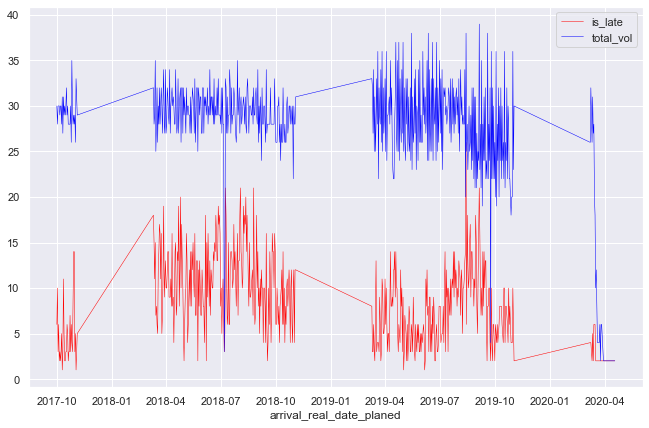

In [369]:
vol_per_date_late['is_late'].plot(linewidth=0.5,color='red',legend='Vol en retard')
vol_per_date['total_vol'].plot(linewidth=0.5,color='blue',legend='Total vols')

As the graph shows, we can see that from October 2017 to April 2018, the number of delays and the number of flights have the same trend, they are increasing.
During the same period for the years 2018-2019, delays are inversely proportional to the number of flights, as long as the number of flights decreases the amount of delay increases and for the period 2019-2020 it is always proportional, the number of flights increases and decreases.

In [370]:
# Single value counting in the dataframe
df_final_review_['Vol'].nunique()

364

In [371]:
# test of the function split
Vol = 'B61509 JBU1509 JetBlue Airways (B6 / JBU)'
Vol.split(' ')

['B61509', 'JBU1509', 'JetBlue', 'Airways', '(B6', '/', 'JBU)']

In [372]:
# test2 of the function split
Vol1 = 'S613 Flag of Haiti Sunrise Airways (S6 / KSZ)'
Vol1.split(' ')

['S613', 'Flag', 'of', 'Haiti', 'Sunrise', 'Airways', '(S6', '/', 'KSZ)']

In [373]:
# test2 of the function split
Vol2 = 'AA1158 AAL1158 American Airlines (AA / AAL)'
Vol2.split(' ')

['AA1158', 'AAL1158', 'American', 'Airlines', '(AA', '/', 'AAL)']

In [374]:
# to select the number of companies
def select_compagnies(x):
    compagnies = ['American Airlines','Haiti Sunrise Airways','JetBlue Airways','Air Century', 'Spirit Airlines','Air France',' Air Caraïbes',' Delta Air Lines','Cubana','Amerijet International','InterCaribbean Airways','Air Transat','Copa Airlines','IBC Airways','Winair']
    for comp  in compagnies:
        if comp in str(x):
            return comp
            
            
    return 'other'

In [375]:
# Test of the function
select_compagnies('S613 Flag of Haiti Sunrise Airways (S6 / KSZ)')

'Haiti Sunrise Airways'

In [376]:

df_final_review_['compagny'] = df_final_review_['Vol'].apply(lambda x: select_compagnies(x) )

<ipython-input-376-b2f6635065b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_review_['compagny'] = df_final_review_['Vol'].apply(lambda x: select_compagnies(x) )


In [377]:
df_final_review_[df_final_review_.compagny == '']

,Vol,De,arrival_real_date_planed,arrival_real_date_time_planed,arrival_real_date_time,year,month,hour,weekday,quarter,delay_in_minutes,duration_in_minutes,is_late,compagny


In [378]:
# function to group the dataset
def group_dataset(dataset,group_columns=[],col_agg=None,colunm_name =None):
    df1 = dataset.groupby(group_columns)[col_agg].count().to_frame().rename(columns={col_agg:colunm_name}).reset_index().sort_values(by=colunm_name,ascending=False)
    df2 = dataset[dataset[col_agg] ==1].groupby(group_columns)[col_agg].count().to_frame().reset_index().sort_values(by=col_agg,ascending=False)
    df3 = dataset[dataset[col_agg] ==0].groupby(group_columns)[col_agg].count().to_frame().rename(columns={col_agg:'not_late'}).reset_index().sort_values(by='not_late',ascending=False)
    df=pd.merge(df1,df2,how='left',on=group_columns)
    df1=pd.merge(df,df3,how='left',on=group_columns)
    df1['% late'] = np.round((df1['is_late']/df1['Total'])*100,2)
    df1.fillna(0,inplace=True)
    df1.sort_values(by='Total',inplace=True)
    return df1
    

In [379]:
# Table to see the number of delays, the percentage of delay
df=group_dataset(df_final_review_,['compagny'],'is_late','Total')

In [380]:
df

,compagny,Total,is_late,not_late,% late
15,Cubana,109,14,95,12.84
14,Winair,134,27,107,20.15
13,Air Transat,165,110,55,66.67
12,Air Caraïbes,194,141,53,72.68
11,IBC Airways,215,78,137,36.28
10,InterCaribbean Airways,256,76,180,29.69
9,Amerijet International,267,97,170,36.33
8,Copa Airlines,393,64,329,16.28
7,Air Century,626,8,618,1.28
6,Delta Air Lines,646,191,455,29.57


Text(0.5, 1.0, 'Table to see the total number of delays by compagny')

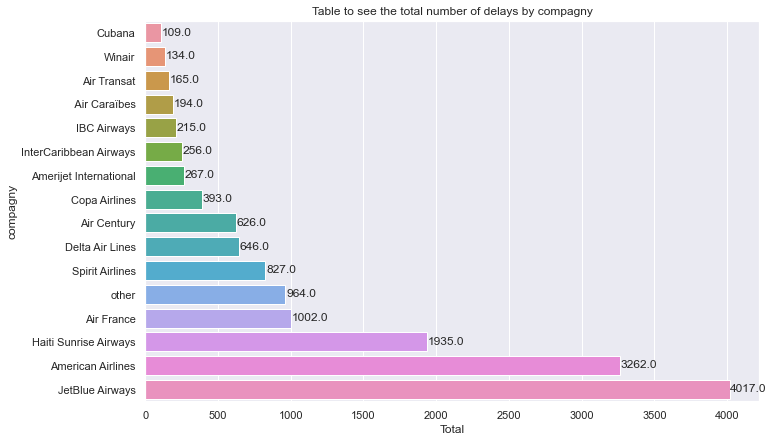

In [381]:
# Table to see the total number of delays by compagny
ax = sns.barplot(x='Total', y='compagny', data=df)
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() +5
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Table to see the total number of delays by compagny')

Text(0.5, 1.0, 'Table to see the number of delays of compagny')

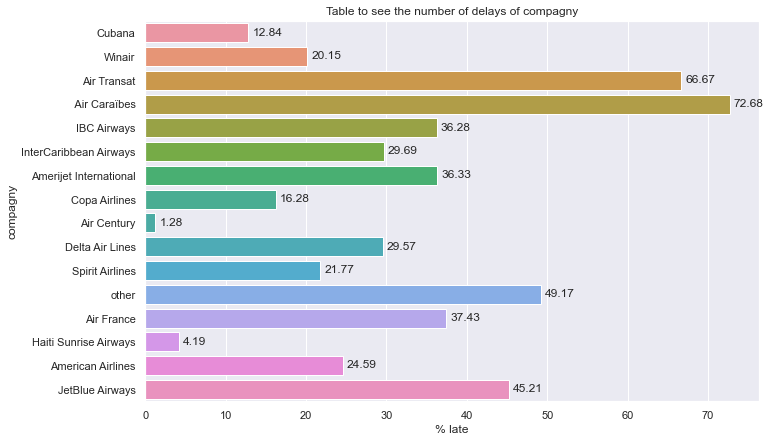

In [382]:
#Graph representing flight delays by company
ax=sns.barplot(x='% late', y='compagny', data=df)
for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width()+0.5
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Table to see the number of delays of compagny')

We can notice that the majority of airlines that make fewer flights are more likely to produce delays, even if JetBlue Airway, despite these many flights, remains the leader in terms of flights and delays.

In [383]:
# by day and year
def group_dataset2(column_name ='weekday'):
    df1=df_final_review_.groupby(['year',column_name]).is_late.count().to_frame().reset_index()
    df1= df1.groupby([column_name]).is_late.mean().reset_index().sort_values('is_late').rename(columns={'is_late':'Total'})
    df2=df_final_review_[df_final_review_.is_late==1].groupby(['year',column_name]).is_late.count().to_frame().reset_index()
    df2 =df2.groupby([column_name]).is_late.mean().reset_index().sort_values('is_late')
    df3=df_final_review_[df_final_review_.is_late==0].groupby(['year',column_name]).is_late.count().to_frame().reset_index()
    df3=df3.groupby([column_name]).is_late.mean().reset_index().sort_values('is_late').rename(columns={'is_late':'not_late'})
    df=pd.merge(df1,df2,how='left',on=column_name)
    df4=pd.merge(df,df3,how='left',on=column_name)
    df4['% late'] = np.round((df4['is_late']/df1['Total'])*100,2)
    df4.fillna(0,inplace=True)
    df4.sort_values(by='Total',inplace=True)
    return df4


In [384]:
df4= group_dataset2('hour')

Text(0.5, 1.0, 'Table to see the total number of delays of hour ')

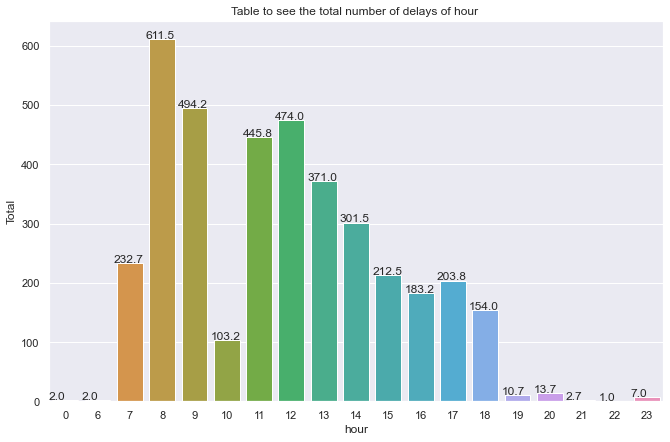

In [385]:
# Table to see the total number of delays of hour
df4.sort_values(by='Total',inplace=True)
ax =sns.barplot(x='hour', y='Total', data=df4)
for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2-0.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Table to see the total number of delays of hour ')

Text(0.5, 1.0, 'Graph representing flight delays by hour')

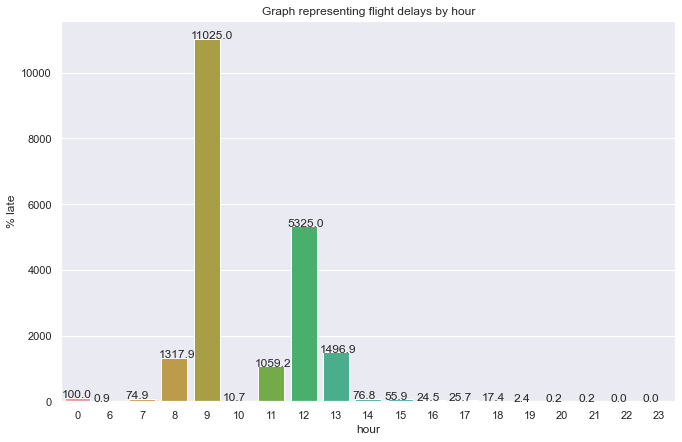

In [386]:
# Table to see the number of delays of hour
df4.sort_values(by='% late',inplace=True)
ax=sns.barplot(x='hour', y='% late', data=df4)
for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2-0.5
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Graph representing flight delays by hour')

A lot of flights are made around eight o'clock, nine o'clock, and eleven o'clock to fourteen o'clock, but around nine o'clock and twelve o'clock there are a lot of delays.

Text(0.5, 1.0, 'Graph representing flight the total delays by company')

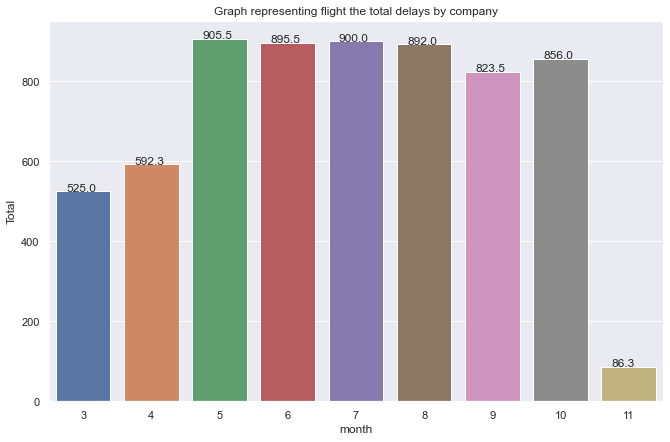

In [387]:
#Graph representing flight the total delays by month
df4= group_dataset2('month')
df4.sort_values(by='Total',inplace=True)
ax=sns.barplot(x='month', y='Total', data=df4)
for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2 -0.25
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Graph representing flight the total delays by company')

Text(0.5, 1.0, 'Graph representing flight the delays by company')

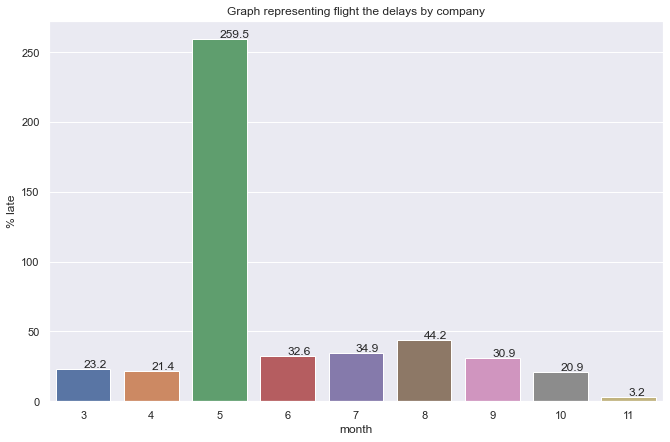

In [388]:
# Graph representing flight the delays by moonth
ax =sns.barplot(x='month', y='% late', data=df4)
for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Graph representing flight the delays by company')


During the months of June, July, August, September, October and November, the majority of flights are made, June and August in particular, in May, the greatest number of delays are there. 

Text(0.5, 1.0, 'Graph representing the total flight the delays by quarter')

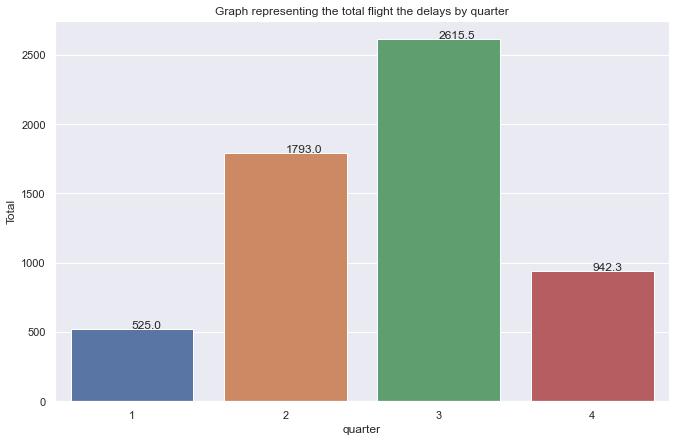

In [389]:
# Graph representing flight the delays by quarter
df4= group_dataset2('quarter')
df4.sort_values(by='Total',inplace=True)
ax =sns.barplot(x='quarter', y='Total', data=df4)
for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Graph representing the total flight the delays by quarter')

Text(0.5, 1.0, 'Graph representing flight the delays by quarter')

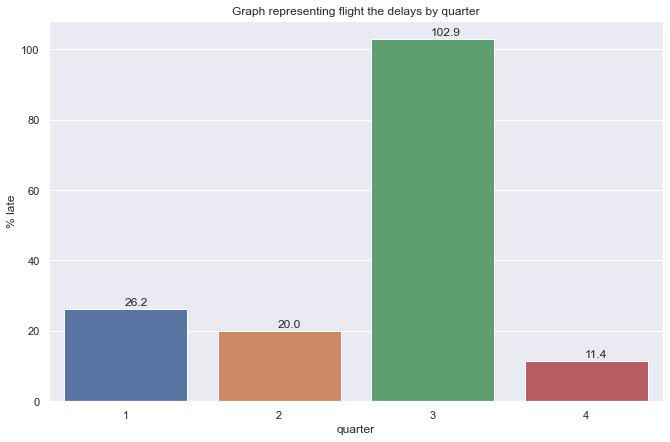

In [390]:
# Graph representing flight the delays by quarter
df4= group_dataset2('quarter')
df4.sort_values(by='Total',inplace=True)
ax =sns.barplot(x='quarter', y='% late', data=df4)
for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2.05
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y), size = 12)
ax.set_title('Graph representing flight the delays by quarter')

The third and second trimester are the two trismetres where there is a great peak of flight, in theme of delay, the third trismeestre is in function of delay is crowned champion, it surpasses all the others.

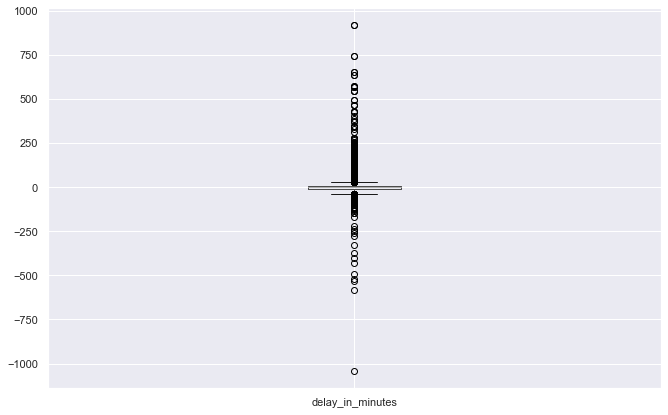

In [391]:
# Graph representing flight the delay_in_minutes
df_final_review_[['delay_in_minutes']].boxplot()

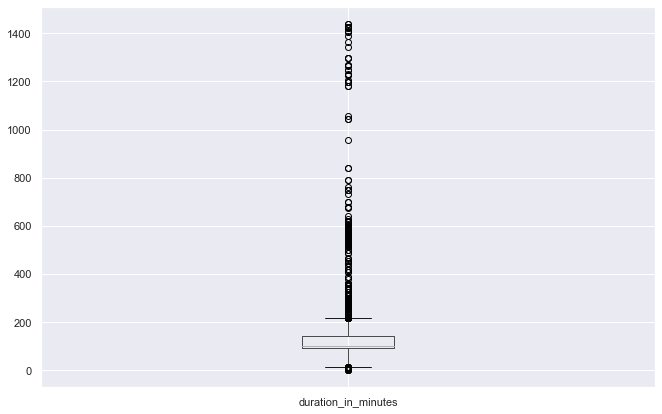

In [392]:
# # Graph representing flight the duration_in_minutes
df_final_review_[['duration_in_minutes']].boxplot()

Distribution focus

In [393]:
# data summaries
df_final_review_.describe()

,year,month,hour,weekday,quarter,delay_in_minutes,duration_in_minutes,is_late
count,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000,15012.000000
mean,2018.420264,6.785105,11.733413,2.959166,2.620171,4.277911,124.969158,0.302025
std,0.649354,2.381881,3.173771,1.996432,0.906685,44.006946,98.196476,0.459151
min,2017.000000,3.000000,0.000000,0.000000,1.000000,-1042.000000,1.000000,0.000000
25%,2018.000000,5.000000,9.000000,1.000000,2.000000,-12.000000,91.000000,0.000000
50%,2018.000000,7.000000,12.000000,3.000000,3.000000,0.000000,101.000000,0.000000
75%,2019.000000,9.000000,14.000000,5.000000,3.000000,5.000000,142.000000,1.000000
max,2020.000000,11.000000,23.000000,6.000000,4.000000,920.000000,1438.000000,1.000000


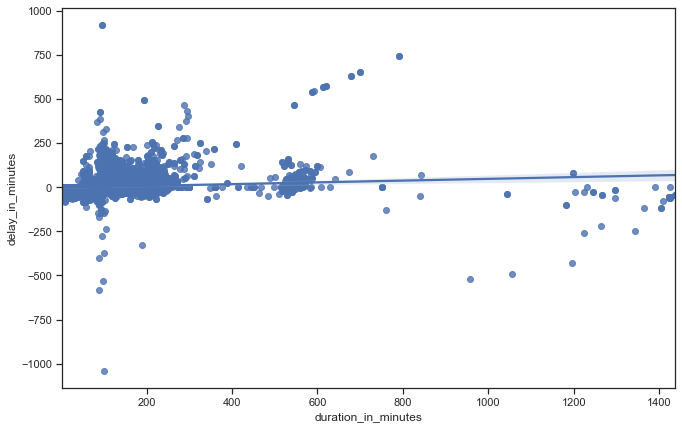

In [394]:
sns.set(style="ticks", color_codes=True)
g = sns.regplot(df_final_review_['duration_in_minutes'],df_final_review_['delay_in_minutes'])

In [395]:
# matrix of crre
df_final_review_.corr()['is_late']

year                  -0.048368
month                 -0.003817
hour                   0.058273
weekday                0.043905
quarter               -0.008618
delay_in_minutes       0.513471
duration_in_minutes    0.191193
is_late                1.000000
Name: is_late, dtype: float64

In [396]:
def letter_year(x):
    x = 'year ' +  str(x)
    #x['month'] = 'month' +  str(x['month'])
    #x['hour'] = 'hour' +  str(x['hour'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    
    return x
    
def letter_month(x):
    x = 'month ' +  str(x)
    #x['month'] = 'month' +  str(x['month'])
    #x['hour'] = 'hour' +  str(x['hour'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    
    return x 
def letter_weekday(x):
    x = 'weekday ' +  str(x)
    #x['month'] = 'month' +  str(x['month'])
    #x['hour'] = 'hour' +  str(x['hour'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    print(x)
    return x
def letter_hour(x):
    x =  str(x) + 'h'
    #x['month'] = 'month' +  str(x['month'])
    #x['hour'] = 'hour' +  str(x['hour'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    print(x)
    return x 

def letter_quater(x):
    x =  'quarter '+str(x) 
    #x['month'] = 'month' +  str(x['month'])
    #x['hour'] = 'hour' +  str(x['hour'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    #x['weekday'] = 'weekday' +  str(x['weekday'])
    print(x)
    return x 

In [397]:
#df_final_review_.year=df_final_review_.year.apply(lambda x : letter_year(x) )
df_final_review_.month=df_final_review_.month.apply(lambda x : letter_month(x) )
df_final_review_.weekday=df_final_review_.weekday.apply(lambda x : letter_weekday(x) )
df_final_review_.hour=df_final_review_.hour.apply(lambda x : letter_hour(x) )
df_final_review_.quarter=df_final_review_.quarter.apply(lambda x : letter_quarter(x) )

c:\users\ing shito3\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2


weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0


weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5


weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4


weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2


weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2


weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1


weekday 4
weekday 4
weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1


weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1
weekday 1


weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0


weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0


weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6


weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 5
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0


weekday 6
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 0
weekday 1
weekday 1
weekday 1
weekday 1
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 2
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 3
weekday 4
weekday 4
weekday 4
weekday 4
weekday 4


12h
13h
13h
13h
13h
13h
13h
7h
7h
7h
7h
8h
8h
8h
9h
9h
9h
9h
10h
11h
11h
11h
11h
11h
11h
12h
12h
12h
12h
12h
13h
13h
14h
14h
14h
14h
15h
7h
7h
8h
8h
8h
8h
9h
9h
9h
9h
9h
9h
10h
11h
11h
11h
11h
11h
11h
11h
12h
12h
12h
12h
13h
14h
14h
14h
15h
15h
7h
7h
8h
8h
8h
8h
8h
8h
8h
9h
9h
9h
9h
9h
10h
10h
11h
11h
11h
11h
11h
11h
11h
11h
11h
12h
12h
12h
12h
7h
7h
7h
7h
8h
8h
8h
8h
8h
8h
9h
9h
9h
9h
9h
9h
10h
10h
11h
11h
11h
11h
11h
11h
11h
12h
12h
12h
12h
12h
7h
7h
8h
8h
8h
8h
8h
8h
8h
8h
9h
9h
9h
9h
9h
9h
11h
11h
11h
11h
11h
12h
12h
13h
13h
13h
13h
13h
13h
13h
7h
8h
8h
8h
8h
9h
9h
9h
10h
10h
11h
11h
11h
11h
11h
11h
12h
12h
13h
14h
15h
16h
16h
17h
17h
17h
18h
18h
7h
8h
7h
8h
8h
8h
9h
9h
10h
11h
11h
11h
11h
12h
12h
12h
13h
13h
13h
13h
13h
13h
14h
15h
15h
16h
16h
17h
18h
18h
19h
7h
7h
8h
8h
8h
9h
9h
10h
11h
11h
11h
12h
12h
12h
12h
13h
13h
13h
14h
14h
15h
15h
16h
17h
17h
18h
18h
7h
8h
8h
7h
8h
8h
8h
8h
9h
9h
9h
10h
11h
11h
11h
11h
12h
12h
12h
13h
14h
14h
15h
15h
16h
16h
17h
17h
18h
18h
18h
7h
8h
7h
8h

11h
11h
11h
11h
12h
13h
14h
15h
15h
16h
8h
8h
9h
9h
11h
11h
11h
11h
12h
13h
14h
15h
15h
16h
18h
8h
8h
9h
9h
11h
11h
11h
12h
12h
12h
13h
14h
15h
15h
15h
8h
8h
9h
9h
11h
11h
11h
12h
12h
12h
13h
14h
15h
15h
15h
16h
16h
7h
8h
8h
9h
9h
11h
11h
12h
12h
12h
12h
13h
13h
7h
8h
8h
9h
9h
11h
11h
12h
12h
12h
12h
13h
13h
14h
14h
15h
15h
16h
18h
8h
8h
9h
9h
11h
11h
11h
12h
13h
14h
15h
8h
8h
9h
9h
11h
11h
11h
12h
13h
14h
15h
15h
16h
18h
8h
8h
9h
9h
11h
11h
11h
11h
12h
13h
13h
14h
15h
15h
16h
18h
8h
8h
9h
9h
11h
11h
11h
11h
12h
13h
13h
14h
15h
15h
16h
18h
7h
8h
8h
9h
9h
10h
11h
11h
12h
12h
12h
13h
14h
14h
7h
8h
8h
9h
9h
10h
11h
11h
12h
12h
12h
13h
14h
14h
15h
15h
16h
8h
8h
9h
9h
11h
11h
12h
13h
13h
13h
14h
14h
15h
8h
8h
9h
9h
11h
11h
12h
13h
13h
13h
14h
14h
15h
15h
16h
18h
8h
8h
9h
9h
11h
11h
11h
12h
12h
13h
14h
14h
15h
15h
8h
8h
9h
9h
11h
11h
11h
12h
12h
13h
14h
14h
15h
15h
16h
16h
18h
8h
8h
9h
9h
11h
11h
11h
11h
11h
12h
12h
12h
14h
8h
8h
9h
9h
11h
11h
11h
11h
11h
12h
12h
12h
14h
14h
15h
15h
16h
16h


12h
13h
14h
14h
8h
8h
9h
9h
9h
10h
11h
11h
12h
13h
14h
14h
15h
16h
17h
18h
7h
8h
8h
9h
9h
9h
10h
11h
11h
11h
12h
12h
13h
14h
7h
8h
8h
9h
9h
9h
10h
11h
11h
11h
12h
12h
13h
14h
14h
16h
17h
17h
17h
18h
8h
8h
9h
9h
9h
10h
11h
11h
12h
13h
8h
8h
9h
9h
9h
10h
11h
11h
12h
13h
14h
14h
14h
15h
16h
17h
8h
8h
9h
9h
9h
10h
11h
11h
11h
12h
13h
14h
14h
8h
8h
9h
9h
9h
10h
11h
11h
11h
12h
13h
14h
14h
15h
16h
17h
18h
8h
8h
9h
9h
9h
10h
11h
11h
12h
12h
13h
14h
8h
8h
9h
9h
9h
10h
11h
11h
12h
12h
13h
14h
15h
16h
17h
7h
8h
8h
9h
9h
11h
11h
12h
13h
13h
14h
14h
15h
15h
16h
7h
8h
8h
9h
9h
11h
11h
12h
13h
13h
14h
14h
15h
15h
16h
18h
8h
8h
9h
9h
10h
11h
11h
11h
12h
13h
13h
14h
15h
16h
8h
8h
9h
9h
10h
11h
11h
11h
12h
13h
13h
14h
15h
16h
16h
8h
8h
9h
9h
12h
13h
14h
14h
15h
16h
16h
18h
8h
8h
9h
9h
12h
13h
14h
14h
15h
16h
16h
18h
7h
8h
8h
9h
9h
10h
11h
11h
11h
11h
12h
13h
14h
15h
16h
16h
7h
8h
8h
9h
9h
10h
11h
11h
11h
11h
12h
13h
14h
15h
16h
16h
8h
8h
9h
9h
10h
11h
12h
13h
13h
13h
14h
15h
16h
16h
8h
8h
9h
9h
10h
11h

16h
17h
17h
18h
18h
8h
8h
8h
8h
8h
9h
9h
10h
11h
11h
12h
12h
13h
13h
8h
8h
8h
8h
8h
9h
9h
10h
11h
11h
12h
12h
13h
13h
14h
15h
16h
17h
17h
17h
18h
18h
18h
7h
7h
7h
8h
8h
7h
7h
7h
8h
8h
8h
8h
8h
9h
10h
11h
12h
12h
12h
12h
12h
13h
14h
15h
15h
16h
18h
8h
8h
9h
12h
12h
12h
13h
8h
8h
9h
12h
12h
12h
13h
13h
13h
13h
14h
15h
16h
17h
17h
17h
18h
18h
8h
8h
8h
8h
8h
9h
9h
10h
11h
11h
11h
8h
8h
8h
8h
8h
9h
9h
10h
11h
11h
11h
12h
12h
13h
13h
14h
15h
16h
17h
17h
17h
18h
18h
18h
8h
8h
8h
8h
8h
8h
8h
8h
8h
8h
9h
10h
11h
12h
12h
12h
12h
13h
13h
13h
15h
16h
17h
18h
20h
7h
8h
8h
8h
8h
8h
9h
10h
11h
7h
8h
8h
8h
8h
8h
9h
10h
11h
11h
11h
12h
12h
12h
13h
13h
14h
14h
15h
15h
16h
17h
17h
17h
17h
18h
18h
18h
8h
8h
8h
8h
8h
8h
9h
10h
10h
11h
12h
12h
12h
12h
12h
13h
14h
15h
16h
16h
17h
17h
17h
18h
8h
8h
8h
8h
8h
9h
8h
8h
8h
8h
8h
9h
9h
10h
11h
12h
12h
12h
13h
13h
14h
14h
15h
15h
15h
16h
16h
17h
17h
17h
18h
18h
18h
7h
8h
8h
7h
8h
8h
8h
8h
8h
8h
9h
10h
10h
11h
12h
12h
12h
12h
13h
13h
14h
14h
15h
15h
16h
16h
16h
18h


12h
13h
13h
13h
13h
13h
14h
14h
15h
17h
17h
17h
17h
17h
18h
7h
8h
8h
8h
8h
8h
9h
9h
10h
11h
11h
11h
12h
12h
12h
12h
12h
13h
13h
13h
13h
14h
15h
15h
17h
17h
17h
18h
20h
7h
7h
7h
8h
8h
8h
8h
8h
9h
9h
11h
11h
11h
11h
12h
12h
12h
12h
13h
13h
13h
14h
14h
14h
14h
15h
17h
17h
17h
17h
17h
7h
8h
8h
8h
8h
9h
9h
11h
11h
11h
12h
12h
12h
12h
12h
12h
13h
13h
14h
15h
16h
17h
17h
17h
17h
17h
18h
7h
7h
8h
7h
7h
8h
8h
8h
8h
8h
9h
9h
9h
11h
11h
11h
12h
12h
13h
13h
13h
13h
14h
14h
15h
16h
17h
17h
17h
17h
17h
18h
18h
7h
7h
8h
8h
8h
8h
8h
9h
9h
11h
11h
11h
12h
12h
12h
12h
12h
13h
13h
14h
14h
14h
15h
17h
17h
7h
8h
8h
8h
9h
7h
8h
8h
8h
9h
9h
11h
11h
11h
12h
12h
12h
13h
13h
13h
13h
14h
14h
14h
15h
17h
17h
17h
17h
17h
7h
8h
8h
8h
8h
7h
8h
8h
8h
8h
8h
9h
9h
9h
11h
11h
11h
11h
12h
12h
13h
13h
13h
14h
14h
15h
17h
17h
17h
17h
17h
17h
18h
18h
7h
7h
8h
8h
8h
8h
9h
9h
10h
11h
11h
11h
11h
11h
12h
12h
12h
12h
13h
13h
13h
14h
14h
15h
17h
17h
17h
18h
20h
7h
7h
7h
7h
8h
8h
8h
8h
9h
9h
11h
11h
11h
12h
12h
12h
12h
12h
13h
13

9h
11h
11h
12h
12h
12h
12h
13h
13h
13h
14h
15h
17h
18h
18h
8h
9h
9h
11h
12h
12h
13h
14h
15h
15h
17h
8h
9h
9h
11h
12h
12h
13h
14h
15h
15h
17h
18h
7h
8h
9h
9h
11h
12h
12h
12h
12h
13h
14h
15h
15h
16h
17h
7h
8h
9h
9h
11h
12h
12h
12h
12h
13h
14h
15h
15h
16h
17h
8h
9h
9h
9h
11h
12h
12h
13h
14h
15h
16h
17h
18h
8h
9h
9h
9h
11h
12h
12h
13h
14h
15h
16h
17h
18h
8h
8h
9h
9h
11h
11h
11h
11h
11h
11h
12h
12h
13h
13h
13h
17h
8h
8h
9h
9h
11h
11h
11h
11h
11h
11h
12h
12h
13h
13h
13h
17h
8h
8h
9h
9h
9h
11h
11h
12h
12h
12h
13h
14h
14h
8h
8h
9h
9h
9h
11h
11h
12h
12h
12h
13h
14h
14h
14h
15h
17h
8h
8h
9h
9h
11h
11h
12h
12h
12h
12h
14h
17h
18h
8h
8h
9h
9h
11h
11h
12h
12h
12h
12h
14h
17h
18h
8h
8h
9h
11h
11h
11h
12h
12h
12h
12h
13h
15h
15h
17h
17h
8h
8h
9h
11h
11h
11h
12h
12h
12h
12h
13h
15h
15h
17h
17h
18h
8h
8h
9h
11h
11h
12h
12h
12h
13h
14h
15h
15h
16h
8h
8h
9h
11h
11h
12h
12h
12h
13h
14h
15h
15h
16h
18h
8h
8h
8h
9h
11h
11h
11h
11h
12h
12h
12h
14h
15h
16h
8h
8h
8h
9h
11h
11h
11h
11h
12h
12h
12h
14h
15h
16h
8

NameError: name 'letter_quarter' is not defined

In [ ]:
df_final_review_

In [ ]:
df_final24=pd.get_dummies(df_final_review_.drop(columns=['De','Vol','arrival_real_date_planed','arrival_real_date_time_planed','arrival_real_date_time','year','quarter','delay_in_minutes']))

In [ ]:
df_final24.head()

In [ ]:
df_corr =df_final24.corr()

In [ ]:
df_corr['abs_is_late'] =np.abs(df_corr['is_late'] )
df_corr[['abs_is_late','is_late']].sort_values(by='abs_is_late',ascending=False)['is_late'].head(20).to_frame()

In this corellation matrix, there can be a strong correlation between the duree, compagny_Haiti Sunrise Airways,
compagny_JetBlue Airways,
duration_in_minutes, hour_7h, hour_8h, compagny_Air Century, month_month 8

## Modeling <a name="modelling"></a>

In [ ]:
# Machine learnig clasification model libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
lr =LogisticRegression()
X=df_final24.drop(columns='is_late')
y=df_final24['is_late']

In [ ]:
# train test split 
#Split the data into training set (70%) and test set(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 50)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.score(X_test,y_test)

In [ ]:
rd =RandomForestClassifier()
rd.fit(X_train,y_train)

In [ ]:
rd.score(X_test,y_test)

In [ ]:
y_pred = rd.predict(X_test)

In [ ]:
# Function for the graphe of the confusion matrix 
def confusion_matrix_plot(class_names=[0,1],colormap='YlGnBu',y_pred=None,y_test=None):
    cnf_matrix=confusion_matrix(y_pred,y_test)
    class_names=class_names # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

In [ ]:
# Generate  Confusion Matrix for RandomForestClassifier model as it has maximum accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix_plot(y_pred=y_pred,y_test=y_test)

In [ ]:
# Confusion_matrix
confusion_matrix(y_pred,y_test)

In [ ]:
#ROC Curve
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(rd, classes=["False Positive", "True Positive"])

visualizer.fit(X_train, y_train)         
visualizer.score(X_test, y_test)                                   
visualizer.show() 

A receiver operating characteristic (ROC) curve is a graph representing the performance of a classification model for all classification thresholds. This curve plots the rate of true positives versus the rate of false positives. 